<a href="https://colab.research.google.com/github/sakshi170920/Myntra_App/blob/main/Myntra_HackerRamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## We aim to help the retailers by providing data insights on

### 1) Customer Behaviour based on a dataset including fields like events (add to cart, transation, view) giving several insights on view time, purchase decisions, etc


# **CUSTOMER BEHAVIOUS ANALYTICS**

In [ ]:
import pandas as pd 
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

## **Exploratory Data Analysis** 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving events.csv to events.csv


In [1]:
edf=pd.read_csv("events.csv")
edf.head()

NameError: ignored

In [ ]:
edf.shape[0] #number of user activities

1048575

In [ ]:
edf.isnull().value_counts() #missing values in each column

timestamp  visitorid  event  itemid  transactionid
False      False      False  False   True             1039921
                                     False               8654
dtype: int64

In [ ]:
edf['event'].unique() #types of events 

array(['view', 'addtocart', 'transaction'], dtype=object)

In [ ]:
edf.transactionid[edf.event=='transaction'].isnull().value_counts() #chcecking missing transactionID

False    8654
Name: transactionid, dtype: int64

In [ ]:
edf.event.value_counts() #count of each event

view           1013165
addtocart        26756
transaction       8654
Name: event, dtype: int64

In [ ]:
samp = edf.duplicated() #removing duplicates
edf = edf[~samp]
edf.reset_index(drop=True, inplace=True)
edf.shape[0] # 1048575 was the original number

912411

In [ ]:
edf.head(10)

,event,itemid
0,view,355908
1,view,248676
2,view,318965
3,view,253185
4,view,367447
5,view,22556
6,view,443030
7,view,439202
8,view,428805
9,view,82389


To know when is the data recorded from we convert the unix timestamp to datetime (which is a module imported above)

In [ ]:
list=[]
for i, unix in enumerate(edf['timestamp']):
    timestamp, ms = divmod(unix, 1000)

    # create the datetime from the timestamp 
    # add the milliseconds separately
    dt = datetime.datetime.fromtimestamp(timestamp) + datetime.timedelta(milliseconds=ms)

    formatted_time = dt.strftime('%Y-%m-%d %H:%M:%S.%f')[:-3]
    list.append(formatted_time)

edf['date_time']=pd.DataFrame({'date_time':list})
edf.head()

,timestamp,visitorid,event,itemid,transactionid,date_time
0,1.433220e+12,257597,view,355908,NaN,2015-06-02 04:40:00.000
1,1.433220e+12,992329,view,248676,NaN,2015-06-02 04:40:00.000
2,1.433220e+12,111016,view,318965,NaN,2015-06-02 04:40:00.000
3,1.433220e+12,483717,view,253185,NaN,2015-06-02 04:40:00.000
4,1.433220e+12,951259,view,367447,NaN,2015-06-02 04:40:00.000


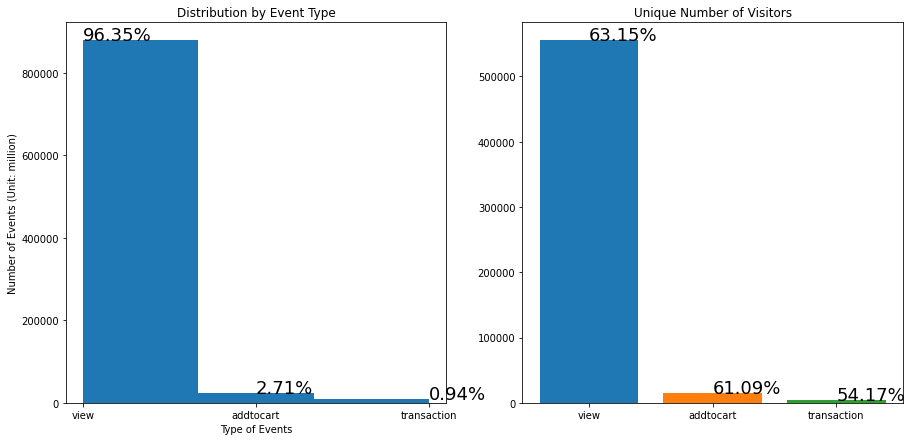

In [ ]:
totalcases=edf.shape[0]
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,7))

# distribution of event type
ax1.hist(edf['event'], bins=3)
ax1.set_xlabel('Type of Events')
ax1.set_ylabel('Number of Events (Unit: million)')
ax1.set_title('Distribution by Event Type')
for x, counts in z
ip(edf['event'].unique().tolist(), edf['event'].value_counts().tolist()):
    text=str(round((counts/totalcases)*100,2)) +'%'
    ax1.text(x, counts, text, fontsize=18)
    
# unique number of visitors by event
for event in edf['event'].unique().tolist():
    height=len(edf['visitorid'][edf['event']==event].unique())
    ax2.bar(x=event, height=height)
    
    text=len(edf['visitorid'][edf['event']==event].unique())/len(edf['visitorid'][edf['event']==event])
    text=str(round(text*100,2)) + '%'
    ax2.text(event, height, text, fontsize=18)
ax2.set_title('Unique Number of Visitors')
plt.show()

DISTRIBUTION OF EVENTS


View 96.35%
Add to Cart 2.71%
Transation 0.94%

NUMBER OF UNIQUE VISITORS

Total views of unique visitors are approximately 550000
Total views = ~900000
Hence it's 63.15% which means on an average each visitor caused 3 actions 

**How many views on an average were needed before making a purchase for an item?**

In [ ]:
Q1. How many times did a customer view an item before making purchase decision?

In [3]:
item_tra=edf[['visitorid','itemid','date_time']][edf['event']=='transaction']
# obtain vistor id,item id, and date time of 'add to cart'
item_atc=edf[['visitorid','itemid','date_time']][edf['event']=='addtocart']
# obtain vistor id,item id, and date time of 'view'
item_viw=edf[['visitorid','itemid','date_time']][edf['event']=='view']

NameError: ignored